In [1]:
import pandas as pd
import numpy as np

In [2]:
users = pd.read_csv('./users.csv')
users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
sessions = pd.read_csv('./sessions.csv')
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [4]:
countries = pd.read_csv('./countries.csv')
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [5]:
# Check for duplicates in users

users[users.duplicated(['id'])]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination


In [6]:
# Find the number of users and features

users.shape

(213451, 16)

In [7]:
# Find the data type of each feature

users.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [8]:
# Find the percentage of null entries for features with null

users.isnull().sum()[users.isnull().sum() != 0]/users.shape[0]*100

date_first_booking         58.347349
age                        41.222576
first_affiliate_tracked     2.841402
dtype: float64

Model 1: Investigate new user booking characteristics that distinguish bookings and non-bookings

In [9]:
# Separate timestamp_first_active into year, month and hour

users['year_first_active'] = users['timestamp_first_active'].apply(lambda x: str(x)[:4])
users['month_first_active'] = users['timestamp_first_active'].apply(lambda x: str(x)[4:6])
users['hour_first_active'] = users['timestamp_first_active'].apply(lambda x: str(x)[8:10]).astype(int)

In [10]:
# Find start and end date of date_first_active

users['date_first_active'] = users['timestamp_first_active'].apply(lambda x: str(x)[:8])
users['date_first_active'] = pd.to_datetime(users['date_first_active'])

In [11]:
users['date_first_active'].min()

Timestamp('2009-03-19 00:00:00')

In [12]:
users['date_first_active'].max()

Timestamp('2014-06-30 00:00:00')

In [13]:
users['year_first_active'].value_counts(normalize = True)*100

2013    38.861378
2014    35.806813
2012    18.493706
2011     5.525390
2010     1.310371
2009     0.002342
Name: year_first_active, dtype: float64

In [14]:
users[users['year_first_active'] == '2009']

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,year_first_active,month_first_active,hour_first_active,date_first_active
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009,03,4,2009-03-19
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009,05,17,2009-05-23
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009,06,23,2009-06-09
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009,10,6,2009-10-31
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009,12,6,2009-12-08


In [15]:
# Remove rows where year_first_active is 2009

users.drop([0,1,2,3,4], axis = 0, inplace = True)

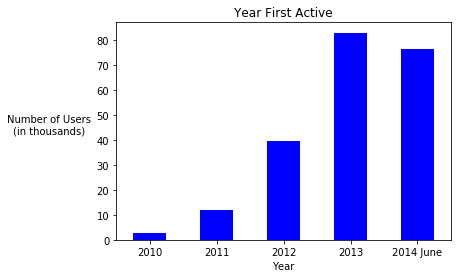

In [17]:
ax = users['year_first_active'].value_counts().sort_index().plot(kind = 'bar', color = 'blue', rot = 0)
ax.set_xticklabels(['2010','2011','2012','2013','2014 June'])
ax.set_yticklabels(['0','10','20','30','40','50','60','70','80'])
ax.set_title('Year First Active', y = 1) 
ax.set_xlabel('Year')
ax.set_ylabel('Number of Users\n(in thousands)').set_rotation(0)
ax.yaxis.set_label_coords(-0.2,0.48)

In [18]:
users['year_first_active'].value_counts(normalize = True)*100

2013    38.862288
2014    35.807652
2012    18.494139
2011     5.525519
2010     1.310402
Name: year_first_active, dtype: float64

In [19]:
users['month_first_active'].value_counts(normalize = True)*100

06    12.849152
05    12.136559
04    10.248962
03     9.522315
01     8.194578
02     7.767773
09     7.209786
08     6.845760
07     6.482202
10     6.314009
12     6.277466
11     6.151439
Name: month_first_active, dtype: float64

In [20]:
users['hour_first_active'].value_counts(normalize = True)[:10]*100

21    6.648989
19    6.642429
20    6.491572
18    6.485481
22    6.478454
23    6.358048
4     5.757897
0     5.747590
17    5.719011
5     5.520366
Name: hour_first_active, dtype: float64

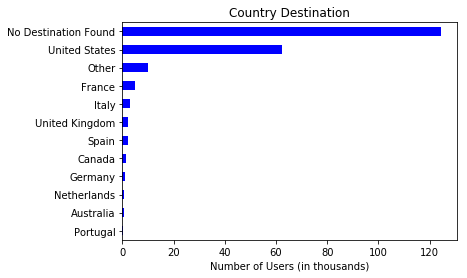

In [21]:
# Check country_destination

ax = users['country_destination'].value_counts().sort_values(ascending = True).plot(kind = 'barh', 
                                                                                    rot = 0, color = 'b')
ax.set_xticklabels(['0','20','40','60','80','100','120'])
ax.set_yticklabels(['Portugal','Australia','Netherlands','Germany','Canada','Spain','United Kingdom',
                   'Italy','France','Other','United States','No Destination Found'])
ax.set_title('Country Destination', y = 1) 
ax.set_xlabel('Number of Users (in thousands)')
ax.yaxis.set_label_coords(-0.5,0.48)

In [22]:
users['country_destination'].value_counts(normalize = True)*100

NDF      58.347779
US       29.222379
other     4.728596
FR        2.353288
IT        1.328205
GB        1.088800
ES        1.053662
CA        0.669022
DE        0.497081
NL        0.356999
AU        0.252523
PT        0.101665
Name: country_destination, dtype: float64

In [23]:
# Create target column

users['booking'] = users['country_destination'].apply(lambda x:0 if x == 'NDF' else 1)

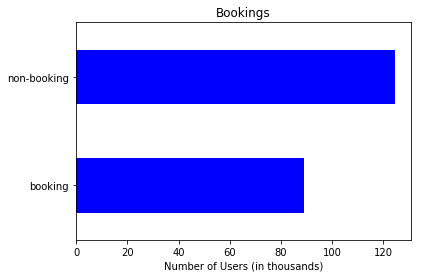

In [24]:
ax = users['booking'].value_counts().sort_values(ascending = True).plot(kind = 'barh', rot = 0, color = 'b')
ax.set_xticklabels(['0','20','40','60','80','100','120'])
ax.set_yticklabels(['booking','non-booking'])
ax.set_title('Bookings', y = 1) 
ax.set_xlabel('Number of Users (in thousands)').set_rotation(0)

In [25]:
users['booking'].value_counts(normalize = True)*100

0    58.347779
1    41.652221
Name: booking, dtype: float64

In [26]:
# Baseline

users['booking'].value_counts(normalize = True)

0    0.583478
1    0.416522
Name: booking, dtype: float64

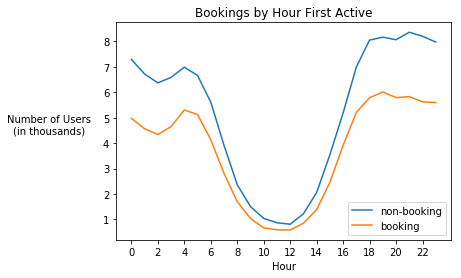

In [27]:
# Check hour_first_active

ax = users.groupby(['booking','hour_first_active'])['hour_first_active'].count().unstack(0).plot()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 24, 2))
ax.set_yticklabels(['0','1','2','3','4','5','6','7','8'])
ax.set_title('Bookings by Hour First Active', y = 1) 
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Users\n(in thousands)').set_rotation(0)
ax.yaxis.set_label_coords(-0.2,0.48)
ax.legend(loc = 'lower right', labels = ['non-booking','booking'])

In [28]:
# Find start and end date of date_account_created

users['date_account_created'] = pd.to_datetime(users['date_account_created'])

In [29]:
users['date_account_created'].min()

Timestamp('2010-01-01 00:00:00')

In [30]:
users['date_account_created'].max()

Timestamp('2014-06-30 00:00:00')

In [31]:
# Separate date_account_created into year and month

users['year_account_created'] = users['date_account_created'].apply(lambda x: str(x.year)).astype(int)
users['month_account_created'] = users['date_account_created'].apply(lambda x: str(x.month))

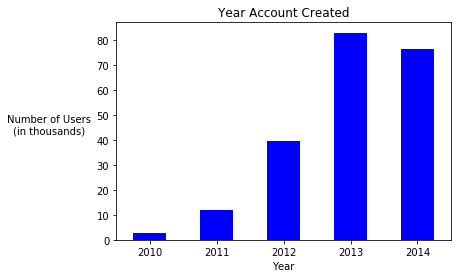

In [32]:
ax = users['year_account_created'].value_counts().sort_index().plot(kind = 'bar', color = 'blue', rot = 0)
ax.set_yticklabels(['0','10','20','30','40','50','60','70','80'])
ax.set_title('Year Account Created', y = 1) 
ax.set_xlabel('Year')
ax.set_ylabel('Number of Users\n(in thousands)').set_rotation(0)
ax.yaxis.set_label_coords(-0.2,0.48)

In [33]:
users['year_account_created'].value_counts(normalize = True)*100

2013    38.866973
2014    35.824518
2012    18.488048
2011     5.515681
2010     1.304780
Name: year_account_created, dtype: float64

In [34]:
users['month_account_created'].value_counts(normalize = True)*100

6     12.846809
5     12.139370
4     10.244746
3      9.522315
1      8.196452
2      7.768710
9      7.211660
8      6.845291
7      6.480328
10     6.313541
12     6.279808
11     6.150970
Name: month_account_created, dtype: float64

In [35]:
# Find start and end date of date_first_booking

users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])

In [36]:
users['date_first_booking'].min()

Timestamp('2010-01-02 00:00:00')

In [37]:
users['date_first_booking'].max()

Timestamp('2015-06-29 00:00:00')

In [38]:
# Separate date_first_booking into year and month

users['year_first_booking'] = users['date_first_booking'].apply(lambda x: str(x.year))
users['month_first_booking'] = users['date_first_booking'].apply(lambda x: str(x.month))

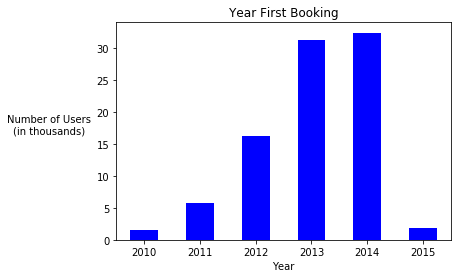

In [39]:
ax = users['year_first_booking'].value_counts()[1:].sort_index().plot(kind = 'bar', color = 'blue', rot = 0)
ax.set_yticklabels(['0','5','10','15','20','25','30'])
ax.set_title('Year First Booking', y = 1) 
ax.set_xlabel('Year')
ax.set_ylabel('Number of Users\n(in thousands)').set_rotation(0)
ax.yaxis.set_label_coords(-0.2,0.48)

In [40]:
users['year_first_booking'].value_counts(normalize = True)*100

nan     58.347779
2014    15.188385
2013    14.644922
2012     7.608482
2011     2.688268
2015     0.830187
2010     0.691978
Name: year_first_booking, dtype: float64

In [41]:
users['month_first_booking'].value_counts(normalize = True)*100

nan    58.347779
6       4.923494
5       4.908970
4       4.128913
3       3.931205
7       3.396175
8       3.304817
2       3.180664
9       3.090711
1       3.041050
10      2.897220
11      2.466198
12      2.382804
Name: month_first_booking, dtype: float64

In [42]:
# Calculate number of days from first active to account created

users['days_active_to_created'] = users['date_account_created'] - users['date_first_active']
users['days_active_to_created'] = users['days_active_to_created'].apply(lambda x: int(x.days))

In [43]:
# Do not need to consider days_active_to_created as 99.9% are 0 days

users['days_active_to_created'].value_counts(normalize = True)[:10]*100

0     99.918949
1      0.003280
2      0.001874
6      0.001874
7      0.001874
29     0.001406
3      0.001406
4      0.001406
5      0.001406
40     0.000937
Name: days_active_to_created, dtype: float64

In [44]:
# Calculate number of days from account created to first booking

users['days_created_to_booking'] = users['date_first_booking'] - users['date_account_created']

days_created_to_booking = []
for i in users['days_created_to_booking']:
    try:
        days_created_to_booking.append(int(i.days))
    except:
        days_created_to_booking.append(np.nan)

users['days_created_to_booking'] = days_created_to_booking

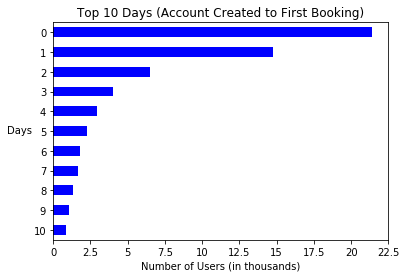

In [45]:
ax = users['days_created_to_booking'].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','2.5','5','7.5','10','12.5','15','17.5','20','22.5'])
ax.set_yticklabels(['10','9','8','7','6','5','4','3','2','1','0'])
ax.set_title('Top 10 Days (Account Created to First Booking)', y = 1) 
ax.set_xlabel('Number of Users (in thousands)')
ax.set_ylabel('Days').set_rotation(0)
ax.yaxis.set_label_coords(-0.1,0.48)

In [46]:
users['days_created_to_booking'] = users['days_created_to_booking'].fillna(0)
users['days_created_to_booking'].value_counts(normalize = True)[:10]*100

0.0     68.375608
1.0      6.922594
2.0      3.056979
3.0      1.882912
4.0      1.375992
5.0      1.059284
6.0      0.837214
7.0      0.776309
8.0      0.617018
9.0      0.490054
10.0     0.413688
Name: days_created_to_booking, dtype: float64

In [47]:
# Calculate number of days from first active to first booking

users['days_active_to_booking'] = users['date_first_booking'] - users['date_first_active']

days_active_to_booking = []
for i in users['days_active_to_booking']:
    try:
        days_active_to_booking.append(int(i.days))
    except:
        days_active_to_booking.append(np.nan)

users['days_active_to_booking'] = days_active_to_booking

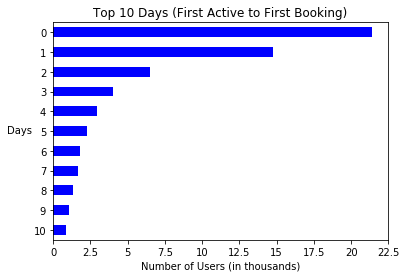

In [48]:
ax = users['days_active_to_booking'].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','2.5','5','7.5','10','12.5','15','17.5','20','22.5'])
ax.set_yticklabels(['10','9','8','7','6','5','4','3','2','1','0'])
ax.set_title('Top 10 Days (First Active to First Booking)', y = 1) 
ax.set_xlabel('Number of Users (in thousands)')
ax.set_ylabel('Days').set_rotation(0)
ax.yaxis.set_label_coords(-0.1,0.48)

In [49]:
users['days_active_to_booking'] = users['days_active_to_booking'].fillna(0)
users['days_active_to_booking'].value_counts(normalize = True)[:10]*100

0.0     68.374202
1.0      6.922594
2.0      3.055574
3.0      1.881506
4.0      1.375992
5.0      1.057410
6.0      0.835809
7.0      0.776309
8.0      0.616549
9.0      0.490991
10.0     0.414156
Name: days_active_to_booking, dtype: float64

In [50]:
# Check gender

users['gender'].value_counts(normalize = True)*100

-unknown-    44.829137
FEMALE       29.533934
MALE         25.504812
OTHER         0.132118
Name: gender, dtype: float64

In [51]:
# Label other gender as unknown

users['gender'] = users['gender'].apply(lambda x:'-unknown-' if x == 'OTHER' else x)

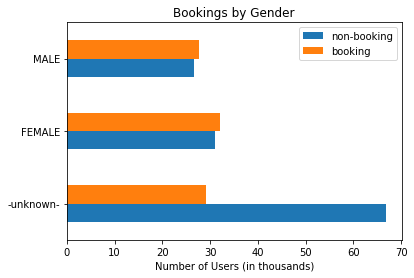

In [52]:
ax = users.groupby(['booking','gender'])['gender'].count().unstack(0).plot(kind = 'barh')
ax.set_xticklabels(['0','10','20','30','40','50','60','70'])
ax.set_title('Bookings by Gender', y = 1) 
ax.set_xlabel('Number of Users (in thousands)').set_rotation(0)
ax.set_ylabel('')
ax.legend(labels = ['non-booking','booking'])

In [53]:
# Check age

users['age'].describe()

count    125457.000000
mean         49.668508
std         155.669085
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [54]:
# Replace ages that do not make sense with np.nan

users['age'] = users['age'].apply(lambda x: np.nan if x < 18 else x)
users['age'] = users['age'].apply(lambda x: np.nan if x > 100 else x)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


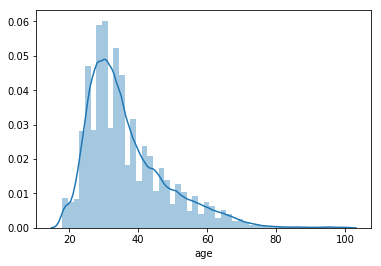

In [55]:
import seaborn as sns

sns.distplot(users['age'].dropna())

In [56]:
# Impute missing ages with median age

users['age'] = users['age'].fillna(users['age'].median())

In [57]:
# Check signup_method

users['signup_method'].value_counts(normalize = True)*100

basic       71.631701
facebook    28.112497
google       0.255802
Name: signup_method, dtype: float64

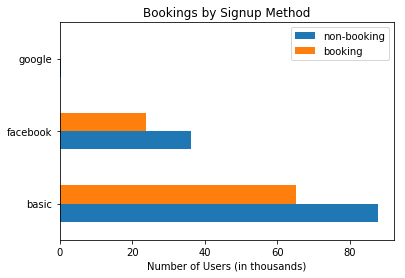

In [58]:
ax = users.groupby(['booking','signup_method'])['signup_method'].count().unstack(0).plot(kind = 'barh')
ax.set_xticklabels(['0','20','40','60','80'])
ax.set_title('Bookings by Signup Method', y = 1) 
ax.set_xlabel('Number of Users (in thousands)').set_rotation(0)
ax.set_ylabel('')
ax.legend(labels = ['non-booking','booking'])

In [59]:
# Check signup_flow

users['signup_flow'].value_counts(normalize = True)[:10]*100

0     77.178771
25     6.867779
12     4.370660
3      4.132661
2      3.223766
24     2.027679
23     1.328205
1      0.490522
6      0.141019
8      0.112441
Name: signup_flow, dtype: float64

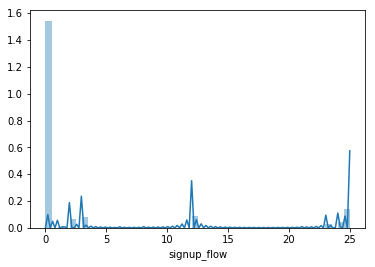

In [60]:
sns.distplot(users['signup_flow'])

In [61]:
# Check language
# Do not need to consider language as 96.7% are en

users['language'].value_counts(normalize = True)[:10]*100

en    96.656297
zh     0.764596
fr     0.549085
es     0.428680
ko     0.349971
de     0.342944
it     0.240810
ru     0.182248
pt     0.112441
ja     0.105413
Name: language, dtype: float64

In [62]:
# Check affiliate_channel

users['affiliate_channel'].value_counts(normalize = True)*100

direct           64.523580
sem-brand        12.202149
sem-non-brand     8.828462
other             4.198252
seo               4.058169
api               3.826261
content           1.849648
remarketing       0.513479
Name: affiliate_channel, dtype: float64

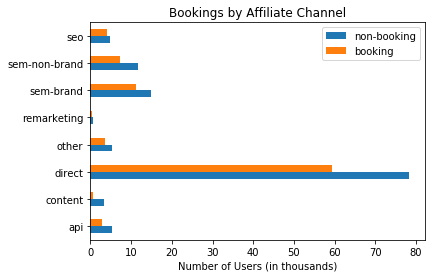

In [63]:
ax = users.groupby(['booking','affiliate_channel'])['affiliate_channel'].count().unstack(0).plot(kind = 'barh')
ax.set_xticklabels(['0','10','20','30','40','50','60','70','80'])
ax.set_title('Bookings by Affiliate Channel', y = 1) 
ax.set_xlabel('Number of Users (in thousands)').set_rotation(0)
ax.set_ylabel('')
ax.legend(labels = ['non-booking','booking'])

In [64]:
# Check affiliate_provider

users['affiliate_provider'].value_counts(normalize = True)[:10]*100

direct                 64.382560
google                 24.217835
other                   5.879239
craigslist              1.626172
bing                    1.090674
facebook                1.064906
vast                    0.388389
padmapper               0.359810
facebook-open-graph     0.255334
yahoo                   0.232377
Name: affiliate_provider, dtype: float64

In [65]:
# Check first_affiliate_tracked

users['first_affiliate_tracked'].value_counts(normalize = True)*100

untracked        52.669724
linked           22.319788
omg              21.208307
tracked-other     2.968449
product           0.750310
marketing         0.067026
local ops         0.016395
Name: first_affiliate_tracked, dtype: float64

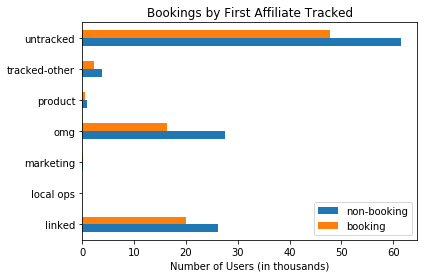

In [66]:
ax = users.groupby(['booking','first_affiliate_tracked'])['first_affiliate_tracked'].count().unstack(0).plot(kind = 'barh')
ax.set_xticklabels(['0','10','20','30','40','50','60'])
ax.set_title('Bookings by First Affiliate Tracked', y = 1) 
ax.set_xlabel('Number of Users (in thousands)').set_rotation(0)
ax.set_ylabel('')
ax.legend(labels = ['non-booking','booking'])

In [67]:
# Check signup_app

users['signup_app'].value_counts(normalize = True)*100

Web        85.601042
iOS         8.910450
Moweb       2.933295
Android     2.555213
Name: signup_app, dtype: float64

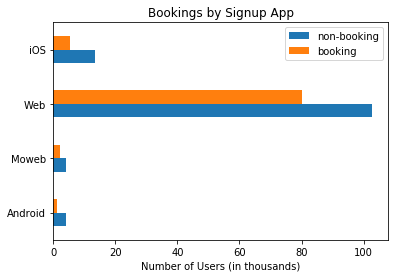

In [68]:
ax = users.groupby(['booking','signup_app'])['signup_app'].count().unstack(0).plot(kind = 'barh')
ax.set_xticklabels(['0','20','40','60','80','100'])
ax.set_title('Bookings by Signup App', y = 1) 
ax.set_xlabel('Number of Users (in thousands)').set_rotation(0)
ax.set_ylabel('')
ax.legend(labels = ['non-booking','booking'])

In [69]:
# Check first_device_type

users['first_device_type'].value_counts(normalize = True)*100

Mac Desktop           41.975956
Windows Desktop       34.067165
iPhone                 9.725645
iPad                   6.717858
Other/Unknown          4.997517
Android Phone          1.313213
Android Tablet         0.605305
Desktop (Other)        0.561735
SmartPhone (Other)     0.035606
Name: first_device_type, dtype: float64

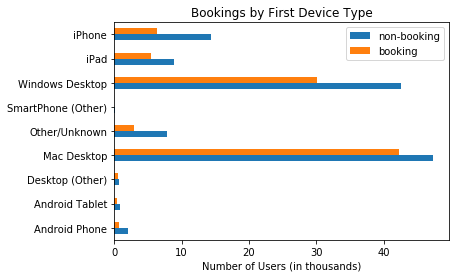

In [70]:
ax = users.groupby(['booking','first_device_type'])['first_device_type'].count().unstack(0).plot(kind = 'barh')
ax.set_xticklabels(['0','10','20','30','40'])
ax.set_title('Bookings by First Device Type', y = 1) 
ax.set_xlabel('Number of Users (in thousands)').set_rotation(0)
ax.set_ylabel('')
ax.legend(labels = ['non-booking','booking'])

In [71]:
# Check first_browser

users['first_browser'].value_counts(normalize = True)[:10]*100

Chrome             29.910141
Safari             21.161793
Firefox            15.766986
-unknown-          12.774191
IE                  9.869944
Mobile Safari       9.029919
Chrome Mobile       0.594998
Android Browser     0.398696
AOL Explorer        0.114783
Opera               0.088078
Name: first_browser, dtype: float64

In [72]:
users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,hour_first_active,date_first_active,booking,year_account_created,month_account_created,year_first_booking,month_first_booking,days_active_to_created,days_created_to_booking,days_active_to_booking
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,34.0,basic,0,en,other,...,21,2010-01-01,1,2010,1,2010,1,0,1.0,1.0
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,...,1,2010-01-02,1,2010,1,2010,1,0,3.0,3.0
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,...,19,2010-01-03,1,2010,1,2010,1,0,10.0,10.0
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,...,0,2010-01-04,1,2010,1,2010,7,0,206.0,206.0
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,...,2,2010-01-04,1,2010,1,2010,1,0,0.0,0.0


Text(0.5, 0, 'Counts (in thousands)')

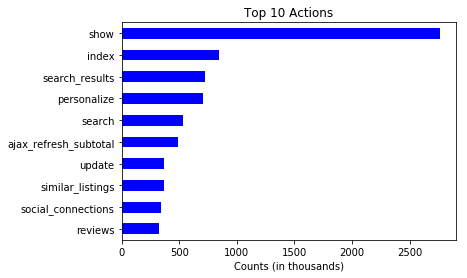

In [73]:
ax = sessions['action'].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','500','1000','1500','2000','2500'])
ax.set_title('Top 10 Actions', y = 1) 
ax.set_xlabel('Counts (in thousands)')

Text(0.5, 0, 'Counts (in thousands)')

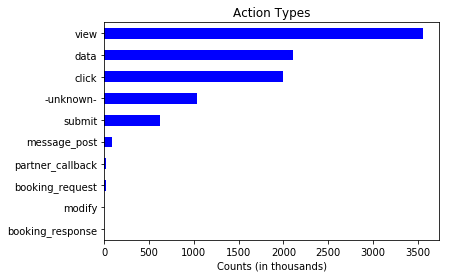

In [74]:
ax = sessions['action_type'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','500','1000','1500','2000','2500','3000','3500'])
ax.set_title('Action Types', y = 1) 
ax.set_xlabel('Counts (in thousands)')

Text(0.5, 0, 'Counts (in thousands)')

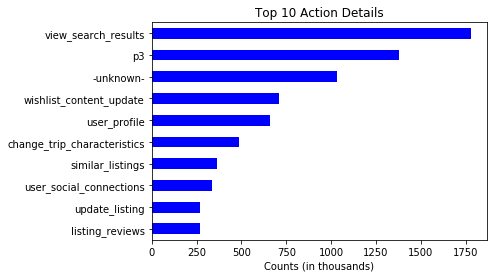

In [75]:
ax = sessions['action_detail'].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','250','500','750','1000','1250','1500','1750'])
ax.set_title('Top 10 Action Details', y = 1) 
ax.set_xlabel('Counts (in thousands)')

Text(0.5, 0, 'Counts (in thousands)')

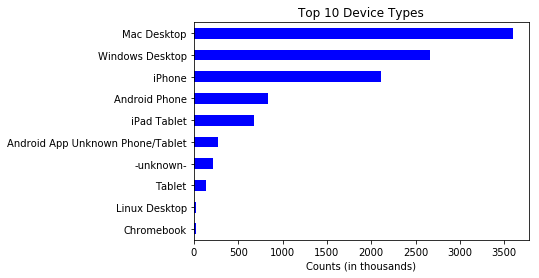

In [76]:
ax = sessions['device_type'].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','500','1000','1500','2000','2500','3000','3500'])
ax.set_title('Top 10 Device Types', y = 1) 
ax.set_xlabel('Counts (in thousands)')

In [77]:
# Find the percentage of null entries for features with null

sessions.isnull().sum()[sessions.isnull().sum() != 0]/sessions.shape[0]*100

user_id           0.326428
action            0.753482
action_type      10.657003
action_detail    10.657003
secs_elapsed      1.287229
dtype: float64

In [78]:
# Remove rows that have missing user_id

sessions.dropna(subset = ['user_id'], axis = 0, inplace = True)

In [79]:
sessions['secs_elapsed'].max()

1799977.0

In [80]:
sessions['secs_elapsed'].min()

0.0

In [81]:
sessions[sessions['secs_elapsed'] == 0].head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
194,ncf87guaf0,personalize,data,wishlist_content_update,Windows Desktop,0.0
320,xwxei6hdk4,NaN,message_post,message_post,iPad Tablet,0.0
743,qtw88d9pbl,other_hosting_reviews_first,-unknown-,-unknown-,Mac Desktop,0.0
1026,ucgks2fyez,ajax_refresh_subtotal,click,change_trip_characteristics,iPad Tablet,0.0
1810,jrqykh9y8x,search_results,click,view_search_results,Mac Desktop,0.0


In [82]:
sessions['secs_elapsed'].std()

88909.20076555545

In [83]:
# Remove rows that have missing secs_elapsed

sessions.dropna(subset = ['secs_elapsed'], axis = 0, inplace = True)

In [84]:
# Remove rows where secs_elapsed is 0

sessions = sessions[sessions['secs_elapsed'] != 0]

In [85]:
# Find the percentage of null entries for features with null

sessions.isnull().sum()[sessions.isnull().sum() != 0]/sessions.shape[0]*100

action            0.574077
action_type      10.790450
action_detail    10.790450
dtype: float64

In [86]:
# Create df for time taken for action

action_df = pd.pivot_table(sessions, index = ['user_id'], columns = ['action'], values = 'secs_elapsed', aggfunc = sum, fill_value = 0)
action_df = action_df.reset_index()

new_names = [(i,'action_'+i) for i in action_df.iloc[:, 1:].columns.values]
action_df = action_df.rename(columns = dict(new_names))

action_df.head()

action,user_id,action_10,action_11,action_12,action_15,action_about_us,action_accept_decline,action_account,action_acculynk_bin_check_failed,action_acculynk_bin_check_success,...,action_view,action_views,action_views_campaign,action_views_campaign_rules,action_webcam_upload,action_weibo_signup_referral_finish,action_why_host,action_widget,action_wishlists,action_zendesk_login_jwt
0,00023iyk9l,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0010k6l0om,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,001wyh0pz8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0028jgx1x1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,002qnbzfs5,301482,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
# Create df for time taken for action_type

action_type_df = pd.pivot_table(sessions, index = ['user_id'], columns = ['action_type'], values = 'secs_elapsed', aggfunc = sum, fill_value = 0)
action_type_df = action_type_df.reset_index()

new_names = [(i,'action_type_'+i) for i in action_type_df.iloc[:, 1:].columns.values]
action_type_df = action_type_df.rename(columns = dict(new_names))
action_type_df.drop(['action_type_-unknown-'], axis = 1, inplace = True)

action_type_df.head()

action_type,user_id,action_type_booking_request,action_type_booking_response,action_type_click,action_type_data,action_type_message_post,action_type_modify,action_type_partner_callback,action_type_submit,action_type_view
0,00023iyk9l,0,0,590691,7043,129817,0,0,0,139368
1,0010k6l0om,0,0,65954,136246,0,0,0,0,260196
2,001wyh0pz8,0,0,158796,1550,0,0,0,50906,44516
3,0028jgx1x1,0,0,199802,8603,0,0,0,0,88116
4,002qnbzfs5,70986,0,644323,293735,325235,0,0,1537719,284735


In [88]:
# Create df for time taken for action_detail

action_detail_df = pd.pivot_table(sessions, index = ['user_id'], columns = ['action_detail'], values = 'secs_elapsed', aggfunc = sum, fill_value = 0)
action_detail_df = action_detail_df.reset_index()

new_names = [(i,'action_detail_'+i) for i in action_detail_df.iloc[:, 1:].columns.values]
action_detail_df = action_detail_df.rename(columns = dict(new_names))
action_detail_df.drop(['action_detail_-unknown-'], axis = 1, inplace = True)

action_detail_df.head()

action_detail,user_id,action_detail_account_notification_settings,action_detail_account_payment_methods,action_detail_account_payout_preferences,action_detail_account_privacy_settings,action_detail_account_transaction_history,action_detail_admin_templates,action_detail_airbnb_picks_wishlists,action_detail_alteration_field,action_detail_alteration_request,...,action_detail_view_resolutions,action_detail_view_search_results,action_detail_view_security_checks,action_detail_view_user_real_names,action_detail_wishlist,action_detail_wishlist_content_update,action_detail_wishlist_note,action_detail_your_listings,action_detail_your_reservations,action_detail_your_trips
0,00023iyk9l,0,0,0,0,0,0,0,0,0,...,0,54791,0,0,0,3515,0,0,0,1466
1,0010k6l0om,0,0,0,0,0,0,0,0,0,...,0,75951,0,0,0,135661,0,0,0,0
2,001wyh0pz8,0,0,0,0,0,0,0,0,0,...,0,158796,0,0,0,0,0,0,0,0
3,0028jgx1x1,0,0,0,0,0,0,0,0,0,...,0,199802,0,0,0,0,0,0,0,0
4,002qnbzfs5,0,0,0,0,0,0,0,0,0,...,0,493417,0,0,0,0,0,0,0,0


In [89]:
# Create df for time taken on device_type

device_type_df = pd.pivot_table(sessions, index = ['user_id'], columns = ['device_type'], values = 'secs_elapsed', aggfunc = sum, fill_value = 0)
device_type_df = device_type_df.reset_index()

new_names = [(i,'device_type_'+i) for i in device_type_df.iloc[:, 1:].columns.values]
device_type_df = device_type_df.rename(columns = dict(new_names))
device_type_df.drop(['device_type_-unknown-'], axis = 1, inplace = True)

device_type_df.head()

device_type,user_id,device_type_Android App Unknown Phone/Tablet,device_type_Android Phone,device_type_Blackberry,device_type_Chromebook,device_type_Linux Desktop,device_type_Mac Desktop,device_type_Opera Phone,device_type_Tablet,device_type_Windows Desktop,device_type_Windows Phone,device_type_iPad Tablet,device_type_iPhone,device_type_iPodtouch
0,00023iyk9l,0,0,0,0,0,295642,0,0,0,0,0,572254,0
1,0010k6l0om,0,0,0,0,0,586543,0,0,0,0,0,0,0
2,001wyh0pz8,282965,0,0,0,0,0,0,0,0,0,0,0,0
3,0028jgx1x1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,002qnbzfs5,0,0,0,0,0,0,0,0,0,0,0,6283569,0


In [90]:
# Create df for total time taken by each user

secs_elapsed_df = sessions.groupby(['user_id'])['secs_elapsed'].sum().reset_index()

secs_elapsed_df.head()

,user_id,secs_elapsed
0,00023iyk9l,867896.0
1,0010k6l0om,586543.0
2,001wyh0pz8,282965.0
3,0028jgx1x1,297010.0
4,002qnbzfs5,6487080.0


In [91]:
# Put all df together

sessions_df = pd.merge(secs_elapsed_df, device_type_df, how = 'left',  on = 'user_id')
sessions_df = pd.merge(sessions_df, action_detail_df, how = 'left',  on = 'user_id')
sessions_df = pd.merge(sessions_df, action_type_df, how = 'left',  on = 'user_id')
sessions_df = pd.merge(sessions_df, action_df, how = 'left',  on = 'user_id')

In [92]:
sessions_df.head()

,user_id,secs_elapsed,device_type_Android App Unknown Phone/Tablet,device_type_Android Phone,device_type_Blackberry,device_type_Chromebook,device_type_Linux Desktop,device_type_Mac Desktop,device_type_Opera Phone,device_type_Tablet,...,action_view,action_views,action_views_campaign,action_views_campaign_rules,action_webcam_upload,action_weibo_signup_referral_finish,action_why_host,action_widget,action_wishlists,action_zendesk_login_jwt
0,00023iyk9l,867896.0,0,0,0,0,0,295642,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0010k6l0om,586543.0,0,0,0,0,0,586543,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001wyh0pz8,282965.0,282965,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0028jgx1x1,297010.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,002qnbzfs5,6487080.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
# Create df for model

df = users[['year_first_active','id','booking']]

In [94]:
# Apply one hot encoding to categorical features

dummy1 = pd.get_dummies(users[['gender','signup_method','affiliate_channel',
                               'affiliate_provider','signup_app','first_device_type',
                               'first_browser']], drop_first = True)
dummy2 = pd.get_dummies(users[['first_affiliate_tracked']], drop_first = True, dummy_na = True)

In [95]:
# Put df and dummy together

dummy = pd.concat([dummy1, dummy2], axis = 1)
df = pd.concat([df, dummy], axis = 1)

In [96]:
# Include numerical features in df

df['age'] = users['age']
df['signup_flow'] = users['signup_flow']
df['hour_first_active'] = users['hour_first_active']
df['days_created_to_booking'] = users['days_created_to_booking']
df['days_active_to_booking'] = users['days_active_to_booking']

In [97]:
# Put df and sessions_df together

df = df.rename(columns = {'id': 'user_id'})
df = pd.merge(df, sessions_df, how = 'left', on = 'user_id')
df = df.fillna(0)

In [98]:
df.head()

,year_first_active,user_id,booking,gender_FEMALE,gender_MALE,signup_method_facebook,signup_method_google,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,...,action_view,action_views,action_views_campaign,action_views_campaign_rules,action_webcam_upload,action_weibo_signup_referral_finish,action_why_host,action_widget,action_wishlists,action_zendesk_login_jwt
0,2010,osr2jwljor,1,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010,lsw9q7uk0j,1,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,0d01nltbrs,1,1,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,a1vcnhxeij,1,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010,6uh8zyj2gn,1,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
# Train set is based on 2010 to 2013 year_first_active
# Test set is based on 2014 year_first_active

X_train = df[df['year_first_active'] != '2014'].iloc[:,3:]
y_train = df[df['year_first_active'] != '2014']['booking']

X_test = df[df['year_first_active'] == '2014'].iloc[:,3:]
y_test = df[df['year_first_active'] == '2014']['booking']

In [100]:
# Standarise numerical features

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train.iloc[:,97:] = ss.fit_transform(X_train.iloc[:,97:]) 
X_test.iloc[:,97:] = ss.transform(X_test.iloc[:,97:])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [101]:
# Try logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
cv_scores = cross_val_score(lr, X_train, y_train, cv = 5, scoring = 'roc_auc')

print('Roc-auc scores:', cv_scores)
print('Mean roc-auc score:', np.mean(cv_scores))
print('Standard deviation of roc-auc scores:', np.std(cv_scores))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Roc-auc scores: [0.88228237 0.92561815 0.92539805 0.91654274 0.91499207]
Mean roc-auc score: 0.9129666777298657
Standard deviation of roc-auc scores: 0.01595629121624303


In [104]:
# Do gridsearch on logistic regression model

from sklearn.model_selection import GridSearchCV

lr_parameter = {'penalty' : ['l1', 'l2'], 
                'solver' : ['liblinear'],
                'max_iter' : [200]}

lr_gridsearch = GridSearchCV(lr, lr_parameter, cv = 5, scoring = 'roc_auc')
lr_gridsearch.fit(X_train, y_train)
gs_score = lr_gridsearch.best_score_

print('Best roc-auc score:', gs_score)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best roc-auc score: 0.912966595966303


In [105]:
# Find the best parameters

parameters = lr_gridsearch.best_params_

print('Best parameters:', parameters)

Best parameters: {'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}


In [106]:
# Check the train scores

best_lr = LogisticRegression(penalty = 'l2', solver = 'liblinear', max_iter = 200)
cv_scores = cross_val_score(best_lr, X_train, y_train, cv = 5, scoring = 'roc_auc')

print('Roc-auc scores:', cv_scores)
print('Mean roc-auc score:', np.mean(cv_scores))
print('Standard deviation of roc-auc scores:', np.std(cv_scores))

Roc-auc scores: [0.88228237 0.92561815 0.92539805 0.91654274 0.91499207]
Mean roc-auc score: 0.9129666777298657
Standard deviation of roc-auc scores: 0.01595629121624303


In [107]:
# Calculate the test score

from sklearn.metrics import roc_auc_score

best_lr.fit(X_train, y_train)
y_pred_prob_lr = best_lr.predict_proba(X_test)
score = roc_auc_score(y_test, y_pred_prob_lr[:,1])

print('Roc-auc score:',score)

Roc-auc score: 0.9208723081023935


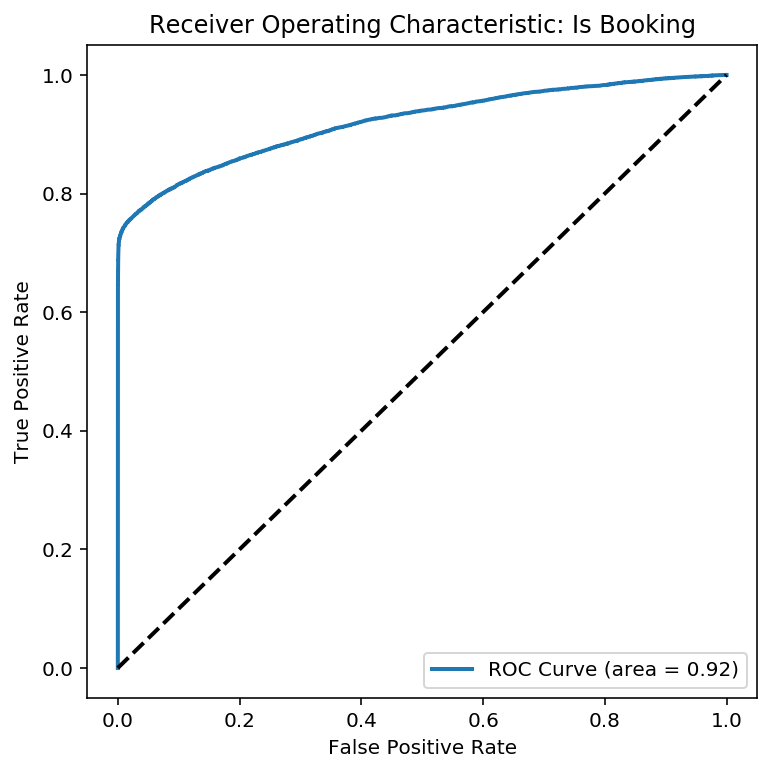

In [108]:
# Plot the roc-auc curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lr[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = [6,6])
plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % roc_auc, linewidth = 2)
plt.plot([0, 1], [0, 1], 'k--', linewidth = 2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic: Is Booking')
plt.legend(loc = "lower right")
plt.show()

In [109]:
# Check the precision, recall and f1 scores

from sklearn.metrics import classification_report

y_pred_lr = best_lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     47213
           1       1.00      0.71      0.83     29217

   micro avg       0.89      0.89      0.89     76430
   macro avg       0.92      0.85      0.87     76430
weighted avg       0.90      0.89      0.88     76430



In [110]:
# Check the number of TP, TN, FP and FN

from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(y_test, y_pred_lr, labels = [0,1]))
confusion_matrix = pd.DataFrame(conmat, index = ['is_non-booking', 'is_booking'],
                                columns = ['predicted_non-booking','predicted_booking'])
confusion_matrix

,predicted_non-booking,predicted_booking
is_non-booking,47167,46
is_booking,8595,20622


In [103]:
# Try knn model
# Score is not too good

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
cv_scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring = 'roc_auc')

print('Roc-auc scores:', cv_scores)
print('Mean roc-auc score:', np.mean(cv_scores))
print('Standard deviation of roc-auc scores:', np.std(cv_scores))

Roc-auc scores: [0.71838673 0.76538376 0.80435308 0.814258   0.81973067]
Mean roc-auc score: 0.7844224478868816
Standard deviation of roc-auc scores: 0.03809789736015282


In [111]:
# Try random forest model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
cv_scores = cross_val_score(rf, X_train, y_train, cv = 5, scoring = 'roc_auc')

print('Roc-auc scores:', cv_scores)
print('Mean roc-auc score:', np.mean(cv_scores))
print('Standard deviation of roc-auc scores:', np.std(cv_scores))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

Roc-auc scores: [0.91648608 0.91940635 0.91342083 0.90506254 0.90961466]
Mean roc-auc score: 0.9127980910110498
Standard deviation of roc-auc scores: 0.005052350024485524


In [112]:
# Do gridsearch on random forest model

rf_parameter = {'n_estimators': [150, 200, 250],
                'min_samples_leaf' : [1, 3, 5, 7],
                'max_features': ['auto', 'log2']}

rf_gridsearch = GridSearchCV(rf, rf_parameter, cv = 5, scoring = 'roc_auc')
rf_gridsearch.fit(X_train, y_train)
gs_score = rf_gridsearch.best_score_

print('Best roc-auc score:', gs_score)

Best roc-auc score: 0.9320594434248816


In [113]:
# Find the best parameters

parameters = rf_gridsearch.best_params_

print('Best parameters:', parameters)

Best parameters: {'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 250}


In [114]:
# Check the train scores

best_rf = RandomForestClassifier(n_estimators = 250, min_samples_leaf = 3, max_features = 'auto')
cv_scores = cross_val_score(best_rf, X_train, y_train, cv = 5, scoring = 'roc_auc')

print('Roc-auc scores:', cv_scores)
print('Mean roc-auc score:', np.mean(cv_scores))
print('Standard deviation of roc-auc scores:', np.std(cv_scores))

Roc-auc scores: [0.92779595 0.93773546 0.93366279 0.92966391 0.93026405]
Mean roc-auc score: 0.931824433791139
Standard deviation of roc-auc scores: 0.0035114419346157126


In [115]:
# Calculate the test score

best_rf.fit(X_train, y_train)
y_pred_prob_rf = best_rf.predict_proba(X_test)
score = roc_auc_score(y_test, y_pred_prob_rf[:,1])

print('Roc-auc score:',score)

Roc-auc score: 0.9293413836487705


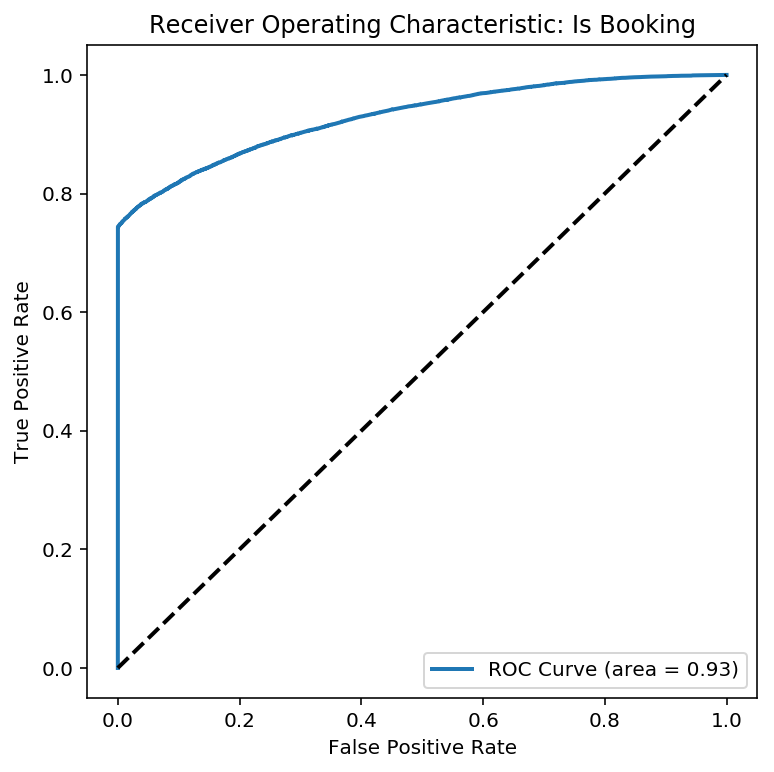

In [116]:
# Plot the roc-auc curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = [6,6])
plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % roc_auc, linewidth = 2)
plt.plot([0, 1], [0, 1], 'k--', linewidth = 2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic: Is Booking')
plt.legend(loc = "lower right")
plt.show()

In [117]:
# Check the precision, recall and f1 scores

y_pred_rf = best_rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93     47213
           1       1.00      0.74      0.85     29217

   micro avg       0.90      0.90      0.90     76430
   macro avg       0.93      0.87      0.89     76430
weighted avg       0.92      0.90      0.90     76430



In [118]:
# Check the number of TP, TN, FP and FN

from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(y_test, y_pred_rf, labels = [0,1]))
confusion_matrix = pd.DataFrame(conmat, index = ['is_non-booking', 'is_booking'],
                                columns = ['predicted_non-booking','predicted_booking'])
confusion_matrix

,predicted_non-booking,predicted_booking
is_non-booking,47213,0
is_booking,7490,21727


In [119]:
# Try xgboost model

import xgboost as xgb

xgb = xgb.XGBClassifier()
cv_scores = cross_val_score(xgb, X_train, y_train, cv = 5, scoring = 'roc_auc')

print('Roc-auc scores:', cv_scores)
print('Mean roc-auc score:', np.mean(cv_scores))
print('Standard deviation of roc-auc scores:', np.std(cv_scores))

Roc-auc scores: [0.94414341 0.95041356 0.93765598 0.93062886 0.92890617]
Mean roc-auc score: 0.9383495941998934
Standard deviation of roc-auc scores: 0.008104031890609828


In [103]:
# Do gridsearch on xgboost model

import xgboost as xgb

xgb_parameter = {'eta' : [0.2,0.3],
                 'max_depth': [4, 6, 8]}

xgb_gridsearch = GridSearchCV(xgb, xgb_parameter, cv = 5, scoring = 'roc_auc')
xgb_gridsearch.fit(X_train, y_train)
gs_score = xgb_gridsearch.best_score_

print('Best roc-auc score:', gs_score)

Best roc-auc score: 0.939852550898346


In [104]:
# Find the best parameters

parameters = xgb_gridsearch.best_params_

print('Best parameters:', parameters)

Best parameters: {'eta': 0.2, 'max_depth': 6}


In [106]:
# Check the train scores

import xgboost as xgb

best_xgb = xgb.XGBClassifier(eta = 0.2, max_depth = 6)
cv_scores = cross_val_score(best_xgb, X_train, y_train, cv = 5, scoring = 'roc_auc')

print('Roc-auc scores:', cv_scores)
print('Mean roc-auc score:', np.mean(cv_scores))
print('Standard deviation of roc-auc scores:', np.std(cv_scores))

Roc-auc scores: [0.94123529 0.95056478 0.93941579 0.93309835 0.9349477 ]
Mean roc-auc score: 0.9398523807180119
Standard deviation of roc-auc scores: 0.006107885653453959


In [108]:
# Calculate the test score

best_xgb.fit(X_train, y_train)
y_pred_prob_xgb = best_xgb.predict_proba(X_test)
score = roc_auc_score(y_test, y_pred_prob_xgb[:,1])

print('Roc-auc score:',score)

Roc-auc score: 0.9380162192559025


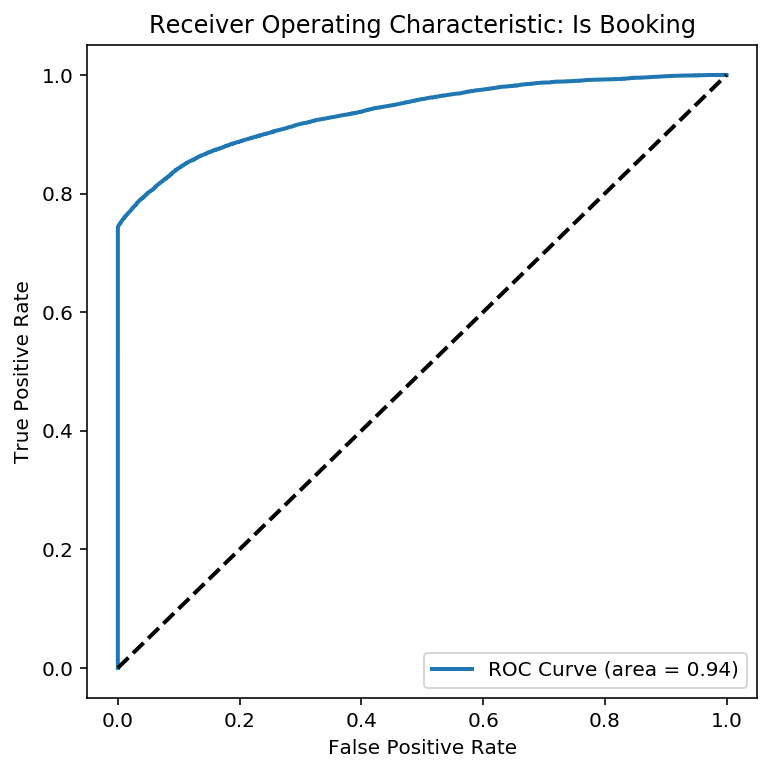

In [109]:
# Plot the roc-auc curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob_xgb[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = [6,6])
plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % roc_auc, linewidth = 2)
plt.plot([0, 1], [0, 1], 'k--', linewidth = 2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic: Is Booking')
plt.legend(loc = "lower right")
plt.show()

In [110]:
# Check the precision, recall and f1 scores

y_pred_xgb = best_xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     47213
           1       0.99      0.75      0.85     29217

   micro avg       0.90      0.90      0.90     76430
   macro avg       0.93      0.87      0.89     76430
weighted avg       0.91      0.90      0.90     76430



In [111]:
# Check the number of TP, TN, FP and FN

from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(y_test, y_pred_xgb, labels = [0,1]))
confusion_matrix = pd.DataFrame(conmat, index = ['is_non-booking', 'is_booking'],
                                columns = ['predicted_non-booking','predicted_booking'])
confusion_matrix

,predicted_non-booking,predicted_booking
is_non-booking,47017,196
is_booking,7302,21915


In [112]:
# XGBoost model is selected because it has the highest roc-auc score.

fi_df = pd.DataFrame({'feature':X_train.columns,
                      'importance':best_xgb.feature_importances_})
fi_df = fi_df.sort_values(by = ['importance'], ascending = False)
fi_df.head(10)

,feature,importance
101,days_active_to_booking,0.914862
2,signup_method_facebook,0.011934
98,signup_flow,0.006130
99,hour_first_active,0.004930
4,affiliate_channel_content,0.004383
29,signup_app_Web,0.003393
5,affiliate_channel_direct,0.003352
95,first_affiliate_tracked_untracked,0.002947
34,first_device_type_Other/Unknown,0.002876
97,age,0.002841


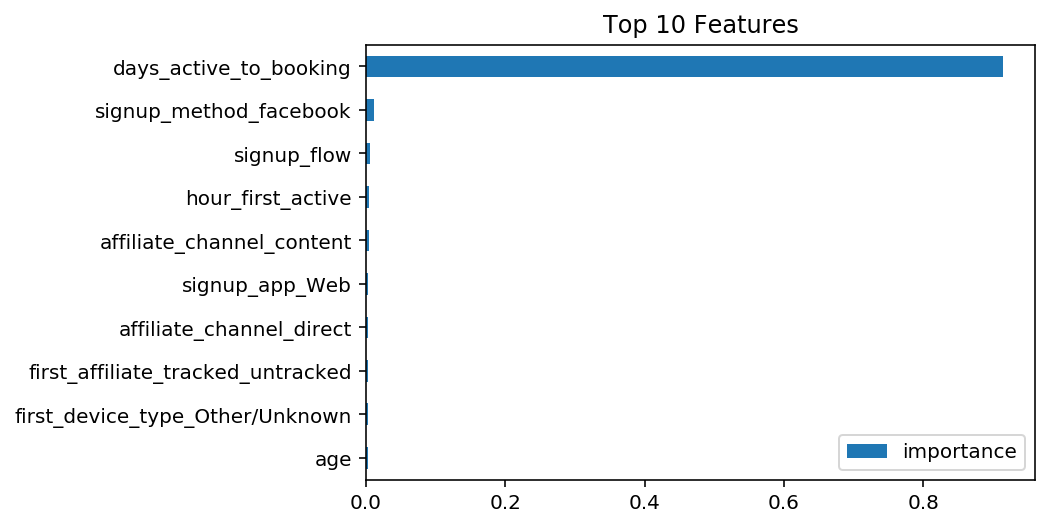

In [113]:
# Plot the top 10 features

fi = fi_df.head(10).sort_values(by = ['importance'])
fi.plot(kind = 'barh')
plt.yticks(range((len(fi))), fi['feature'])
plt.title('Top 10 Features')
plt.legend(loc = "lower right")
plt.show()

Model 2: Investigate new user booking characteristics that distinguish booking destinations

In [101]:
# Remove rows that are non-booking

users = users[users['country_destination'] != 'NDF']

In [102]:
# Put users and countries together

users = pd.merge(users, countries, how = 'left',  on = 'country_destination')
users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,month_first_booking,days_active_to_created,days_created_to_booking,days_active_to_booking,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,34.0,basic,0,en,other,...,1,0,1.0,1.0,36.966427,-95.84403,0.0,9826675.0,eng,0.0
1,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,...,1,0,3.0,3.0,36.966427,-95.84403,0.0,9826675.0,eng,0.0
2,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,...,1,0,10.0,10.0,36.966427,-95.84403,0.0,9826675.0,eng,0.0
3,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,...,7,0,206.0,206.0,36.966427,-95.84403,0.0,9826675.0,eng,0.0
4,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,...,1,0,0.0,0.0,36.966427,-95.84403,0.0,9826675.0,eng,0.0


In [103]:
# Find the number of users and features

users.shape

(88905, 34)

In [104]:
# Find the data type of each feature

users.dtypes

id                                       object
date_account_created             datetime64[ns]
timestamp_first_active                    int64
date_first_booking               datetime64[ns]
gender                                   object
age                                     float64
signup_method                            object
signup_flow                               int64
language                                 object
affiliate_channel                        object
affiliate_provider                       object
first_affiliate_tracked                  object
signup_app                               object
first_device_type                        object
first_browser                            object
country_destination                      object
year_first_active                        object
month_first_active                       object
hour_first_active                         int64
date_first_active                datetime64[ns]
booking                                 

In [105]:
# Find the percentage of null entries for features with null

users.isnull().sum()[users.isnull().sum() != 0]/users.shape[0]*100

first_affiliate_tracked           1.954896
lat_destination                  11.352567
lng_destination                  11.352567
distance_km                      11.352567
destination_km2                  11.352567
destination_language             11.352567
language_levenshtein_distance    11.352567
dtype: float64

In [106]:
# Check gender

users['gender'].value_counts(normalize = True)*100

FEMALE       35.983353
-unknown-    32.836173
MALE         31.180474
Name: gender, dtype: float64

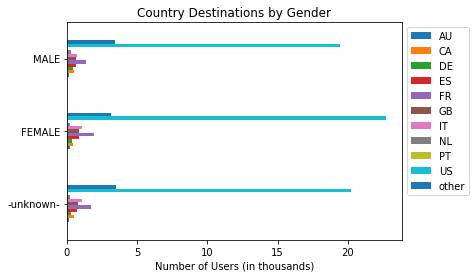

In [107]:
ax = users.groupby(['country_destination','gender'])['gender'].count().unstack(0).plot(kind = 'barh')
ax.set_xticklabels(['0','5','10','15','20'])
ax.set_title('Country Destinations by Gender', y = 1) 
ax.set_xlabel('Number of Users (in thousands)').set_rotation(0)
ax.set_ylabel('')
ax.legend(bbox_to_anchor = (1, 1))

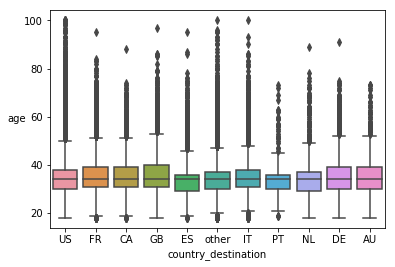

In [108]:
# Check age

ax = sns.boxplot(y = users['age'], x = users['country_destination'])
ax.set_ylabel('age').set_rotation(0)
ax.yaxis.set_label_coords(-0.1,0.48)

In [109]:
# Check signup_method

users['signup_method'].value_counts(normalize = True)*100

basic       73.166864
facebook    26.719532
google       0.113604
Name: signup_method, dtype: float64

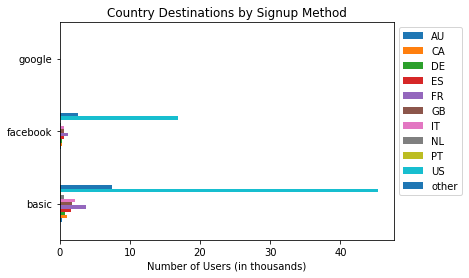

In [110]:
ax = users.groupby(['country_destination','signup_method'])['signup_method'].count().unstack(0).plot(kind = 'barh')
ax.set_xticklabels(['0','10','20','30','40'])
ax.set_title('Country Destinations by Signup Method', y = 1) 
ax.set_xlabel('Number of Users (in thousands)').set_rotation(0)
ax.set_ylabel('')
ax.legend(bbox_to_anchor = (1, 1))

In [111]:
# Check signup_flow

users['signup_flow'].value_counts(normalize = True)*100

0     78.614251
3      6.314605
25     4.451943
2      4.138125
12     3.447500
24     1.704066
23     0.723244
1      0.190091
6      0.184467
8      0.124852
21     0.094483
15     0.004499
20     0.002250
16     0.002250
5      0.002250
10     0.001125
Name: signup_flow, dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


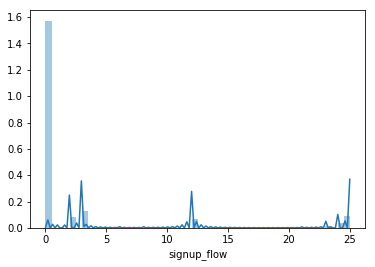

In [112]:
sns.distplot(users['signup_flow'])

In [113]:
# Check language
# Do not need to consider language as 97.5% are en

users['language'].value_counts(normalize = True)[:10]*100

en    97.475957
zh     0.586019
fr     0.448794
es     0.309319
de     0.303695
ko     0.271076
ru     0.123728
it     0.116979
ja     0.094483
pt     0.069737
Name: language, dtype: float64

In [114]:
# Check affiliate_channel

users['affiliate_channel'].value_counts(normalize = True)*100

direct           66.807266
sem-brand        12.478488
sem-non-brand     8.042292
seo               4.448569
other             4.049266
api               3.132557
content           0.627636
remarketing       0.413925
Name: affiliate_channel, dtype: float64

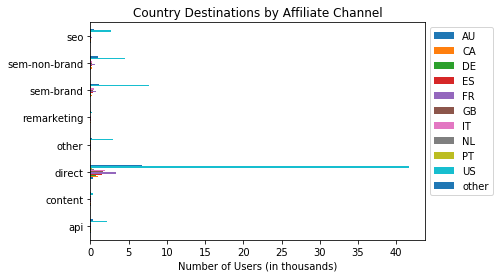

In [115]:
ax = users.groupby(['country_destination','affiliate_channel'])['affiliate_channel'].count().unstack(0).plot(kind = 'barh')
ax.set_xticklabels(['0','5','10','15','20','25','30','35','40'])
ax.set_title('Country Destinations by Affiliate Channel', y = 1) 
ax.set_xlabel('Number of Users (in thousands)').set_rotation(0)
ax.set_ylabel('')
ax.legend(bbox_to_anchor = (1, 1))

In [116]:
# Check affiliate_provider

users['affiliate_provider'].value_counts(normalize = True)[:10]*100

direct                 66.622800
google                 23.372139
other                   5.244924
craigslist              1.817671
bing                    0.936955
facebook                0.890839
vast                    0.304820
padmapper               0.283449
yahoo                   0.195715
facebook-open-graph     0.158596
Name: affiliate_provider, dtype: float64

In [117]:
# Check first_affiliate_tracked

users['first_affiliate_tracked'].value_counts(normalize = True)*100

untracked        54.763844
linked           23.061480
omg              18.843140
tracked-other     2.627141
product           0.621795
marketing         0.072275
local ops         0.010325
Name: first_affiliate_tracked, dtype: float64

Text(0, 0.5, '')

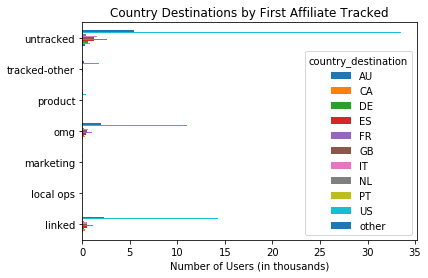

In [118]:
ax = users.groupby(['country_destination','first_affiliate_tracked'])['first_affiliate_tracked'].count().unstack(0).plot(kind = 'barh')
ax.set_xticklabels(['0','5','10','15','20','25','30','35'])
ax.set_title('Country Destinations by First Affiliate Tracked', y = 1) 
ax.set_xlabel('Number of Users (in thousands)').set_rotation(0)
ax.set_ylabel('')

In [119]:
# Check signup_app
# Do not need to consider signup_app as 90.0% are Web

users['signup_app'].value_counts(normalize = True)*100

Web        90.003937
iOS         6.198751
Moweb       2.410438
Android     1.386874
Name: signup_app, dtype: float64

In [120]:
# Check first_device_type

users['first_device_type'].value_counts(normalize = True)*100

Mac Desktop           47.520387
Windows Desktop       33.913728
iPhone                 7.217817
iPad                   6.145886
Other/Unknown          3.233789
Android Phone          0.804229
Desktop (Other)        0.618638
Android Tablet         0.517406
SmartPhone (Other)     0.028120
Name: first_device_type, dtype: float64

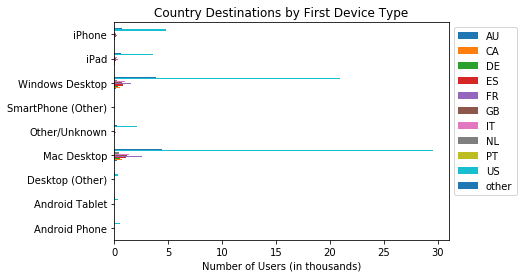

In [121]:
ax = users.groupby(['country_destination','first_device_type'])['first_device_type'].count().unstack(0).plot(kind = 'barh')
ax.set_xticklabels(['0','5','10','15','20','25','30'])
ax.set_title('Country Destinations by First Device Type', y = 1) 
ax.set_xlabel('Number of Users (in thousands)').set_rotation(0)
ax.set_ylabel('')
ax.legend(bbox_to_anchor = (1, 1))

In [122]:
# Check first_browser

users['first_browser'].value_counts(normalize = True)[:10]*100

Chrome             33.604409
Safari             22.182104
Firefox            17.691918
IE                  8.685676
-unknown-           8.568697
Mobile Safari       8.077161
Chrome Mobile       0.458917
Android Browser     0.314943
Opera               0.071987
AOL Explorer        0.070862
Name: first_browser, dtype: float64

In [123]:
# Check country_destination

users['country_destination'].value_counts(normalize = True)*100

US       70.158034
other    11.352567
FR        5.649851
IT        3.188797
GB        2.614026
ES        2.529666
CA        1.606209
DE        1.193409
NL        0.857095
AU        0.606265
PT        0.244081
Name: country_destination, dtype: float64

In [124]:
# Create target column

country = []
for i in users['country_destination']:
    if i == 'US':
        country.append(1)
    elif i == 'FR':
        country.append(2)
    elif i == 'IT':
        country.append(3)
    elif i == 'GB':
        country.append(4)
    elif i == 'ES':
        country.append(5)
    elif i == 'CA':
        country.append(6)
    elif i == 'DE':
        country.append(7)
    elif i == 'NL':
        country.append(8)
    elif i == 'AU':
        country.append(9)
    elif i == 'PT':
        country.append(10)
    else:
        country.append(11)
        
users['country'] = country

In [125]:
# Baseline

users['country'].value_counts(normalize = True)*100

1     70.158034
11    11.352567
2      5.649851
3      3.188797
4      2.614026
5      2.529666
6      1.606209
7      1.193409
8      0.857095
9      0.606265
10     0.244081
Name: country, dtype: float64

In [126]:
# Check hour_first_active

users['hour_first_active'].value_counts(normalize = True)[:10]*100

19    6.760025
21    6.557561
18    6.511445
20    6.510320
22    6.325853
23    6.293234
4     5.964794
17    5.862437
5     5.761206
0     5.594736
Name: hour_first_active, dtype: float64

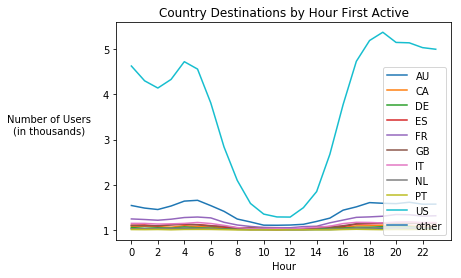

In [127]:
ax = users.groupby(['country_destination','hour_first_active'])['hour_first_active'].count().unstack(0).plot()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 24, 2))
ax.set_yticklabels(['0','1','2','3','4','5','6','7','8'])
ax.set_title('Country Destinations by Hour First Active', y = 1) 
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Users\n(in thousands)').set_rotation(0)
ax.yaxis.set_label_coords(-0.2,0.48)
ax.legend(loc = 'lower right')

In [128]:
# Check days_active_to_created
# Do not need to consider days_active_to_created as 99.9% are 0

users['days_active_to_created'].value_counts(normalize = True)[:10]*100

0     99.863900
1      0.005624
6      0.004499
29     0.003374
4      0.003374
3      0.003374
95     0.002250
37     0.002250
5      0.002250
57     0.002250
Name: days_active_to_created, dtype: float64

In [129]:
# Check days_created_to_booking

users['days_created_to_booking'].value_counts(normalize = True)[:10]*100

0.0     24.075136
1.0     16.619988
2.0      7.339295
3.0      4.520556
4.0      3.303526
5.0      2.543164
6.0      2.010011
7.0      1.863787
8.0      1.481357
9.0      1.176537
10.0     0.993195
Name: days_created_to_booking, dtype: float64

In [130]:
# Check days_active_to_booking

users['days_active_to_booking'].value_counts(normalize = True)[:10]*100

0.0     24.071762
1.0     16.619988
2.0      7.335920
3.0      4.517181
4.0      3.303526
5.0      2.538665
6.0      2.006636
7.0      1.863787
8.0      1.480232
9.0      1.178786
10.0     0.994320
Name: days_active_to_booking, dtype: float64

In [131]:
from geopy.geocoders import Nominatim

geolocator = Nominatim() 
asia = geolocator.geocode('Asia')

print('Asia latitude:', asia.latitude)
print('Asia longitude:', asia.longitude)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


Asia latitude: 51.2086975
Asia longitude: 89.2343748


In [132]:
# Impute missing lat_destination with lat_destination of Asia

users['lat_destination'] = users['lat_destination'].fillna(asia.latitude)

In [133]:
# Check lat_destination

users['lat_destination'].value_counts(normalize = True)*100

 36.966427    70.158034
 51.208697    11.352567
 46.232193     5.649851
 41.873990     3.188797
 54.633220     2.614026
 39.896027     2.529666
 62.393303     1.606209
 51.165707     1.193409
 52.133057     0.857095
-26.853388     0.606265
 39.553444     0.244081
Name: lat_destination, dtype: float64

In [134]:
# Impute missing lng_destination with lng_destination of Asia

users['lng_destination'] = users['lng_destination'].fillna(asia.longitude)

In [135]:
# Check lng_destination

users['lng_destination'].value_counts(normalize = True)*100

-95.844030     70.158034
 89.234375     11.352567
 2.209667       5.649851
 12.564167      3.188797
-3.432277       2.614026
-2.487694       2.529666
-96.818146      1.606209
 10.452764      1.193409
 5.295250       0.857095
 133.275160     0.606265
-7.839319       0.244081
Name: lng_destination, dtype: float64

In [136]:
from geopy.distance import great_circle

us = (36.966427, -95.844030)
asia = (51.2086975, 89.2343748)

print('Distance between US and Asia:', great_circle(us, asia).kilometers)

Distance between US and Asia: 10197.950186475564


In [137]:
# Impute missing distance_km with distance between US and Asia

users['distance_km'] = users['distance_km'].fillna(great_circle(us, asia).kilometers)

In [138]:
# Check distance_km

users['distance_km'].value_counts(normalize = True)*100

0.000000        70.158034
10197.950186    11.352567
7682.945000      5.649851
8636.631000      3.188797
6883.659000      2.614026
7730.724000      2.529666
2828.133300      1.606209
7879.568000      1.193409
7524.320300      0.857095
15297.744000     0.606265
7355.253400      0.244081
Name: distance_km, dtype: float64

In [139]:
# Impute missing language_levenshtein_distance with mean of non-zero 
# language_levenshtein_distance 

mean_lld = users[users['language_levenshtein_distance'] != 0]['language_levenshtein_distance'].mean()
users['language_levenshtein_distance'] = users['language_levenshtein_distance'].fillna(mean_lld)

In [140]:
# Check language_levenshtein_distance

users['language_levenshtein_distance'].value_counts(normalize = True)*100

0.000000     74.984534
88.026849    11.352567
92.060000     5.649851
89.400000     3.188797
92.250000     2.529666
72.610000     1.193409
63.220000     0.857095
95.450000     0.244081
Name: language_levenshtein_distance, dtype: float64

In [141]:
# Create df1 for model

df1 = users[['year_first_active','id','country']]

In [142]:
# Apply one hot encoding to categorical features

dummy3 = pd.get_dummies(users[['gender','signup_method','affiliate_channel',
                               'affiliate_provider','first_device_type','first_browser']], 
                               drop_first = True)
dummy4 = pd.get_dummies(users[['first_affiliate_tracked']], drop_first = True, dummy_na = True)

In [143]:
# Put df1 and dummy5 together

dummy5 = pd.concat([dummy3, dummy4], axis = 1)
df1 = pd.concat([df1, dummy5], axis = 1)

In [144]:
# Include numerical features in df1

df1['age'] = users['age']
df1['signup_flow'] = users['signup_flow']
df1['hour_first_active'] = users['hour_first_active']
df1['days_created_to_booking'] = users['days_created_to_booking']
df1['days_active_to_booking'] = users['days_active_to_booking']
df1['distance_km'] = users['distance_km']
df1['language_levenshtein_distance'] = users['language_levenshtein_distance']

In [145]:
# Put df1 and sessions_df together

df1 = df1.rename(columns = {'id': 'user_id'})
df1 = pd.merge(df1, sessions_df, how = 'left', on = 'user_id')
df1 = df1.fillna(0)

In [146]:
df1.head()

,year_first_active,user_id,country,gender_FEMALE,gender_MALE,signup_method_facebook,signup_method_google,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,...,action_view,action_views,action_views_campaign,action_views_campaign_rules,action_webcam_upload,action_weibo_signup_referral_finish,action_why_host,action_widget,action_wishlists,action_zendesk_login_jwt
0,2010,osr2jwljor,1,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010,lsw9q7uk0j,1,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,0d01nltbrs,1,1,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,a1vcnhxeij,1,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010,6uh8zyj2gn,1,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
# Train set is based on 2010 to 2013 year_first_active
# Test set is based on 2014 year_first_active

Xn_train = df1[df1['year_first_active'] != '2014'].iloc[:,3:]
yn_train = df1[df1['year_first_active'] != '2014']['country']

Xn_test = df1[df1['year_first_active'] == '2014'].iloc[:,3:]
yn_test = df1[df1['year_first_active'] == '2014']['country']

In [148]:
# Standarise numerical features

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xn_train.iloc[:,81:] = ss.fit_transform(Xn_train.iloc[:,81:]) 
Xn_test.iloc[:,81:] = ss.transform(Xn_test.iloc[:,81:])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [176]:
# Try logistic regression with different parameters

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

skf = StratifiedKFold(n_splits = 5)
cv_scores = []

for train_index, test_index in skf.split(Xn_train, yn_train): 
    
    X_train, X_test = Xn_train.loc[train_index], Xn_train.loc[test_index]
    y_train, y_test = yn_train.loc[train_index], yn_train.loc[test_index]
    
    sm = SMOTE(random_state = 42)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

    lr = LogisticRegression(penalty = 'l2', solver = 'liblinear', multi_class = 'ovr')
    lr.fit(X_train_smote, y_train_smote)
    y_pred = lr.predict(X_test)
    score = f1_score(y_test, y_pred, average = 'micro')
    cv_scores.append(score)

print('f1 scores:', cv_scores)
print('Mean f1 score:', np.mean(cv_scores))
print('Standard deviation of f1 scores:', np.std(cv_scores))

f1 scores: [0.9236372770660638, 0.9313175307814724, 0.9292954678729999, 0.9328864683703393, 0.930115635997989]
Mean f1 score: 0.9294504760177729
Standard deviation of f1 scores: 0.003148068751279947


In [177]:
# Calculate the test score

lr_1 = LogisticRegression(penalty = 'l2', solver = 'liblinear', multi_class = 'ovr')
lr_1.fit(Xn_train, yn_train)
yn_pred_lr_1 = lr_1.predict(Xn_test)
score = f1_score(yn_test, yn_pred_lr_1, average = 'micro')

print('f1 score:',score)

f1 score: 0.9304514494985796


In [178]:
# Check the precision, recall and f1 scores

from sklearn.metrics import classification_report

print(classification_report(yn_test, yn_pred_lr_1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20419
           2       0.65      1.00      0.79      1461
           3       0.71      0.73      0.72       994
           4       0.59      1.00      0.74       741
           5       0.45      0.01      0.01       713
           6       1.00      0.10      0.19       450
           7       0.27      0.20      0.23       255
           8       0.74      0.06      0.10       251
           9       1.00      0.16      0.27       152
          10       0.00      0.00      0.00        83
          11       0.93      1.00      0.97      3698

   micro avg       0.93      0.93      0.93     29217
   macro avg       0.67      0.48      0.46     29217
weighted avg       0.93      0.93      0.91     29217



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text yticklabel objects>)

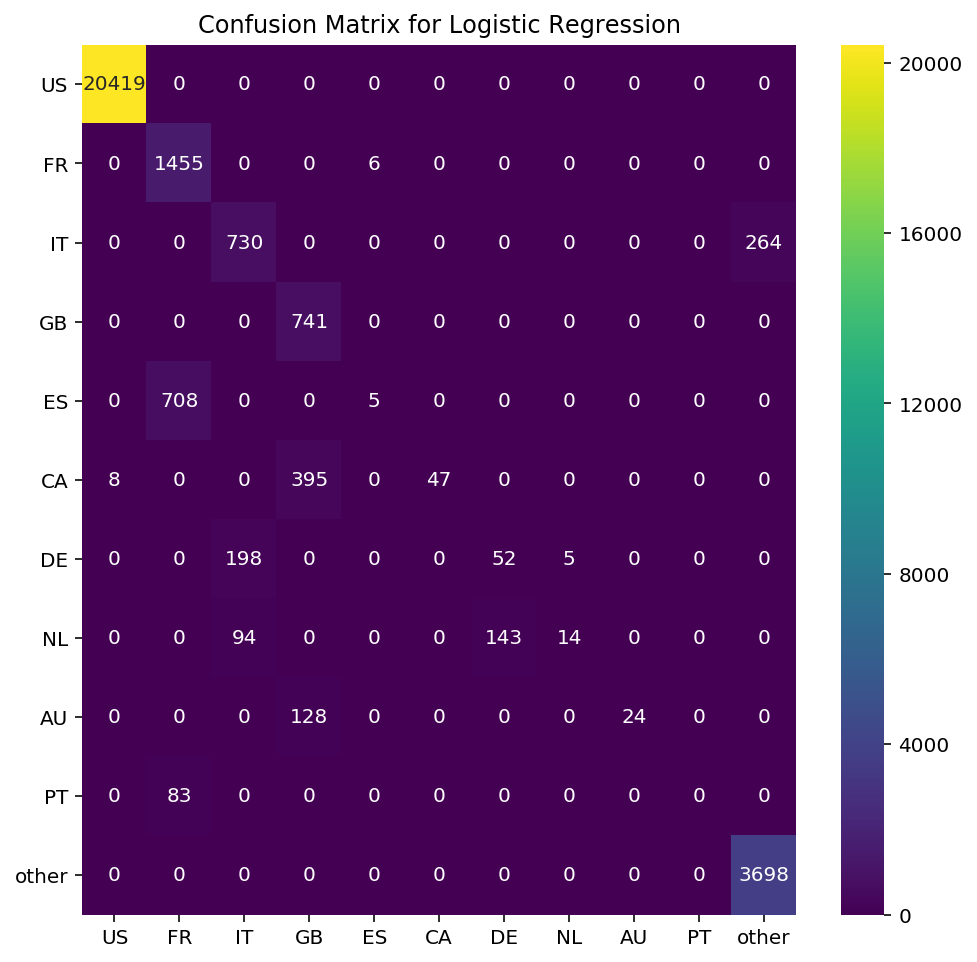

In [199]:
# Check the number of TP, TN, FP and FN

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conmat = np.array(confusion_matrix(yn_test, yn_pred_lr_1))
fig, ax = plt.subplots(figsize = (8,8)) 
ticks = ['US','FR','IT','GB','ES','CA','DE','NL','AU','PT','other']
sns.heatmap(conmat, cmap = 'viridis', annot = True, fmt = '', ax = ax, xticklabels = ticks, yticklabels = ticks)
plt.title('Confusion Matrix for Logistic Regression', y = 1)
plt.yticks(rotation = 0)

In [200]:
skf = StratifiedKFold(n_splits = 5)
cv_scores = []

for train_index, test_index in skf.split(Xn_train, yn_train): 
    
    X_train, X_test = Xn_train.loc[train_index], Xn_train.loc[test_index]
    y_train, y_test = yn_train.loc[train_index], yn_train.loc[test_index]
    
    sm = SMOTE(random_state = 42)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

    lr = LogisticRegression(penalty = 'l1', solver = 'saga', multi_class = 'multinomial')
    lr.fit(X_train_smote, y_train_smote)
    y_pred = lr.predict(X_test)
    score = f1_score(y_test, y_pred, average = 'micro')
    cv_scores.append(score)

print('f1 scores:', cv_scores)
print('Mean f1 score:', np.mean(cv_scores))
print('Standard deviation of f1 scores:', np.std(cv_scores))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


f1 scores: [0.9869379552876162, 0.9957282854510427, 0.9939683337521991, 0.9984080435693339, 0.995139936316407]
Mean f1 score: 0.9940365108753196
Standard deviation of f1 scores: 0.003836250423675967


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [155]:
# Calculate the test score

lr_2 = LogisticRegression(penalty = 'l1', solver = 'saga', multi_class = 'multinomial')
lr_2.fit(Xn_train, yn_train)
yn_pred_lr_2 = lr_2.predict(Xn_test)
score = f1_score(yn_test, yn_pred_lr_2, average = 'micro')

print('f1 score:',score)

f1 score: 0.9727898141492967


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [156]:
# Check the precision, recall and f1 scores

print(classification_report(yn_test, yn_pred_lr_2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20419
           2       0.65      0.99      0.78      1461
           3       1.00      1.00      1.00       994
           4       1.00      1.00      1.00       741
           5       0.52      0.02      0.04       713
           6       1.00      1.00      1.00       450
           7       1.00      1.00      1.00       255
           8       1.00      1.00      1.00       251
           9       1.00      1.00      1.00       152
          10       0.00      0.00      0.00        83
          11       1.00      1.00      1.00      3698

   micro avg       0.97      0.97      0.97     29217
   macro avg       0.83      0.82      0.80     29217
weighted avg       0.97      0.97      0.96     29217



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text yticklabel objects>)

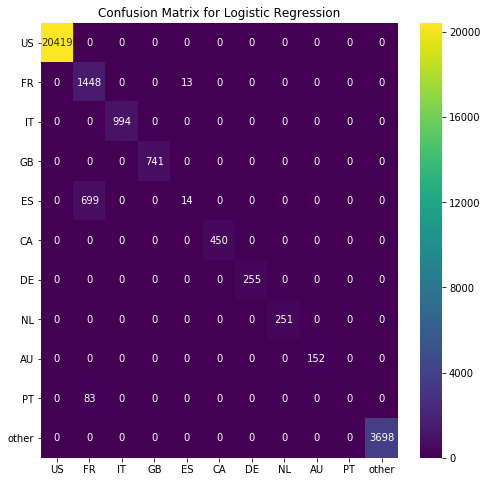

In [157]:
# Check the number of TP, TN, FP and FN

from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(yn_test, yn_pred_lr_2))
fig, ax = plt.subplots(figsize = (8,8)) 
ticks = ['US','FR','IT','GB','ES','CA','DE','NL','AU','PT','other']
sns.heatmap(conmat, cmap = 'viridis', annot = True, fmt = '', ax = ax, xticklabels = ticks, yticklabels = ticks)
plt.title('Confusion Matrix for Logistic Regression', y = 1)
plt.yticks(rotation = 0)

In [211]:
# Try random forest with different parameters

from sklearn.ensemble import RandomForestClassifier

skf = StratifiedKFold(n_splits = 5)
cv_scores = []

for train_index, test_index in skf.split(Xn_train, yn_train): 
    
    X_train, X_test = Xn_train.loc[train_index], Xn_train.loc[test_index]
    y_train, y_test = yn_train.loc[train_index], yn_train.loc[test_index]
    
    sm = SMOTE(random_state = 42)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

    rf = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 5, max_features = 'auto')
    rf.fit(X_train_smote, y_train_smote)
    y_pred = rf.predict(X_test)
    score = f1_score(y_test, y_pred, average = 'micro')
    cv_scores.append(score)

print('f1 scores:', cv_scores)
print('Mean f1 score:', np.mean(cv_scores))
print('Standard deviation of f1 scores:', np.std(cv_scores))

f1 scores: [0.9496776354349828, 0.9639835832146746, 0.9694228030493424, 0.9678257226644323, 0.9645550527903469]
Mean f1 score: 0.9630929594307558
Standard deviation of f1 scores: 0.007005252510652351


In [212]:
# Calculate the test score

rf_1 = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 5, max_features = 'auto')
rf_1.fit(Xn_train, yn_train)
yn_pred_rf_1 = rf_1.predict(Xn_test)
score = f1_score(yn_test, yn_pred_rf_1, average = 'micro')

print('f1 score:',score)

f1 score: 0.7533285416024917


In [213]:
# Check the precision, recall and f1 scores

print(classification_report(yn_test, yn_pred_rf_1))

              precision    recall  f1-score   support

           1       0.74      1.00      0.85     20419
           2       0.00      0.00      0.00      1461
           3       0.00      0.00      0.00       994
           4       0.00      0.00      0.00       741
           5       0.00      0.00      0.00       713
           6       0.00      0.00      0.00       450
           7       0.00      0.00      0.00       255
           8       0.00      0.00      0.00       251
           9       0.00      0.00      0.00       152
          10       0.00      0.00      0.00        83
          11       1.00      0.43      0.60      3698

   micro avg       0.75      0.75      0.75     29217
   macro avg       0.16      0.13      0.13     29217
weighted avg       0.64      0.75      0.67     29217



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text yticklabel objects>)

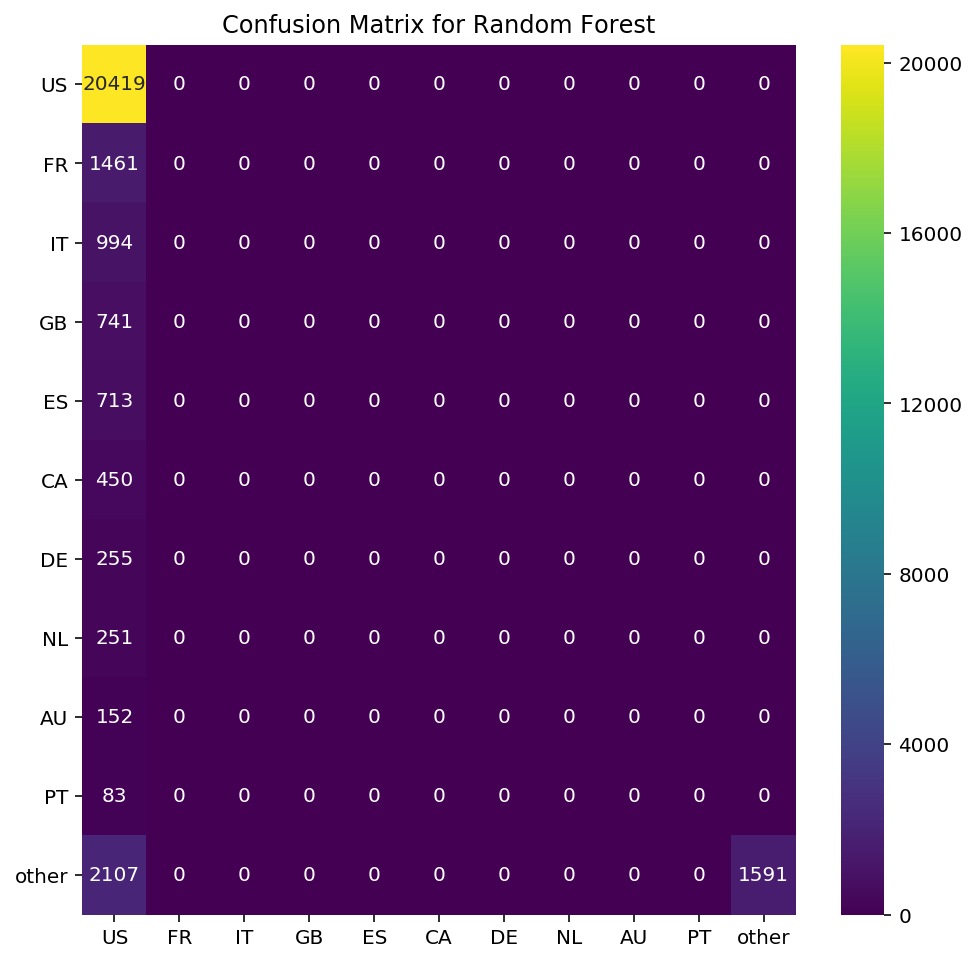

In [214]:
# Check the number of TP, TN, FP and FN

from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(yn_test, yn_pred_rf_1))
fig, ax = plt.subplots(figsize = (8,8)) 
ticks = ['US','FR','IT','GB','ES','CA','DE','NL','AU','PT','other']
sns.heatmap(conmat, cmap = 'viridis', annot = True, fmt = '', ax = ax, xticklabels = ticks, yticklabels = ticks)
plt.title('Confusion Matrix for Random Forest', y = 1)
plt.yticks(rotation = 0)

In [149]:
# Try knn with different parameters

from sklearn.neighbors import KNeighborsClassifier

skf = StratifiedKFold(n_splits = 5)
cv_scores = []

for train_index, test_index in skf.split(Xn_train, yn_train): 
    
    X_train, X_test = Xn_train.loc[train_index], Xn_train.loc[test_index]
    y_train, y_test = yn_train.loc[train_index], yn_train.loc[test_index]
    
    sm = SMOTE(random_state = 42)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

    knn = KNeighborsClassifier()
    knn.fit(X_train_smote, y_train_smote)
    y_pred = knn.predict(X_test)
    score = f1_score(y_test, y_pred, average = 'micro')
    cv_scores.append(score)

print('f1 scores:', cv_scores)
print('Mean f1 score:', np.mean(cv_scores))
print('Standard deviation of f1 scores:', np.std(cv_scores))

f1 scores: [0.8118563175081638, 0.8528352458329843, 0.8564966071877356, 0.8614997905320486, 0.8584715937657114]
Mean f1 score: 0.8482319109653288
Standard deviation of f1 scores: 0.01840417032611259


In [150]:
# Calculate the test score

knn = KNeighborsClassifier()
knn.fit(Xn_train, yn_train)
yn_pred_knn = knn.predict(Xn_test)
score = f1_score(yn_test, yn_pred_knn, average = 'micro')

print('f1 score:',score)

f1 score: 0.8714789334976213


In [151]:
# Check the precision, recall and f1 scores

print(classification_report(yn_test, yn_pred_knn))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99     20419
           2       0.38      0.59      0.46      1461
           3       0.28      0.22      0.24       994
           4       0.99      0.83      0.90       741
           5       0.17      0.10      0.13       713
           6       0.88      0.15      0.25       450
           7       0.23      0.11      0.15       255
           8       0.62      0.06      0.11       251
           9       1.00      0.96      0.98       152
          10       0.00      0.00      0.00        83
          11       0.79      0.82      0.80      3698

   micro avg       0.87      0.87      0.87     29217
   macro avg       0.57      0.44      0.46     29217
weighted avg       0.87      0.87      0.86     29217



(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text yticklabel objects>)

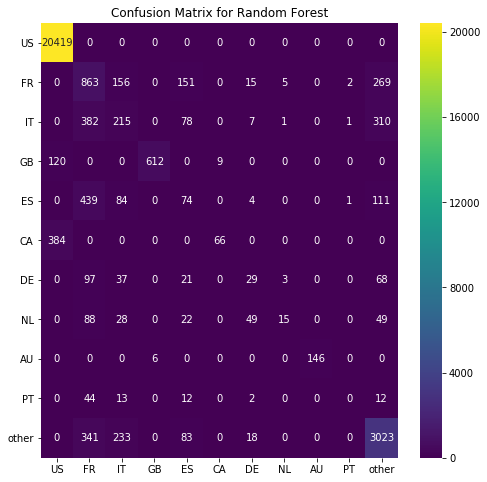

In [153]:
# Check the number of TP, TN, FP and FN

from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(yn_test, yn_pred_knn))
fig, ax = plt.subplots(figsize = (8,8)) 
ticks = ['US','FR','IT','GB','ES','CA','DE','NL','AU','PT','other']
sns.heatmap(conmat, cmap = 'viridis', annot = True, fmt = '', ax = ax, xticklabels = ticks, yticklabels = ticks)
plt.title('Confusion Matrix for Random Forest', y = 1)
plt.yticks(rotation = 0)

In [158]:
# Logistic regression model is selected because it has the highest f1 score.

lr_2_df = pd.DataFrame(lr_2.coef_, columns = (Xn_train.columns)).T
lr_2_df.columns = ['US','FR','IT','GB','ES','CA','DE','NL','AU','PT','others']
lr_2_df.head()

,US,FR,IT,GB,ES,CA,DE,NL,AU,PT,others
gender_FEMALE,1.295404,0.000000,-0.146263,0.254258,-0.056091,0.828501,-0.031622,0.018604,0.000000,0.001339,-0.377051
gender_MALE,1.160252,-0.229985,-0.400985,0.155341,-0.067562,0.893448,0.036548,0.129931,-0.145692,0.000000,-0.471183
signup_method_facebook,0.337851,-0.182969,-0.102086,0.066037,0.000000,0.091330,0.000004,-0.042972,0.000000,0.003468,-0.152483
signup_method_google,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
affiliate_channel_content,0.000000,0.310864,-0.811956,0.000000,0.000000,0.000000,0.000000,0.282729,0.000000,0.000000,-1.644772


In [159]:
for i in lr_2_df.columns:
    df_i = lr_2_df[[i]]
    df_i['odds ratio'] = df_i[i].apply(lambda x : np.exp(x))
    df_i = df_i.sort_values(by = ['odds ratio'], ascending = False)
    print(df_i.head(10))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                                         US  odds ratio
affiliate_provider_google          2.501986   12.206710
affiliate_channel_direct           2.298831    9.962529
affiliate_provider_direct          2.166222    8.725255
first_device_type_Mac Desktop      2.138029    8.482704
first_device_type_Windows Desktop  1.936759    6.936233
first_affiliate_tracked_untracked  1.804607    6.077584
gender_FEMALE                      1.295404    3.652473
gender_MALE                        1.160252    3.190737
first_affiliate_tracked_omg        0.966899    2.629776
first_browser_Chrome               0.777410    2.175829
                                              FR    odds ratio
language_levenshtein_distance          20.836653  1.120065e+09
affiliate_provider_craigslist           0.778678  2.178589e+00
first_device_type_iPhone                0.692597  1.998900e+00
first_device_type_iPad                  0.417280  1.517827e+00
affiliate_provider_yahoo                0.410867  1.508124e+00
first_